# Customer segementation using K means cluster algorithm

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### data collection and analysis

In [94]:
df=pd.read_csv("Mall_Customers.csv")

In [95]:
customer_data=df
customer_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [96]:
customer_data.shape

(200, 5)

In [97]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [98]:
## gives missing data
customer_data.isnull().sum() 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [99]:
## choosing income and spending score
X=customer_data.iloc[:,[3,4]].values
## : -> rows, [3,4] -> column
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [100]:
# Choosing clusters
## WCSS -> within clusters sum of squares

In [101]:
WCSS =[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

C:\Users\navee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


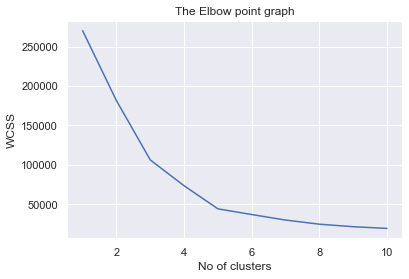

In [102]:
#plot
sns.set()
plt.plot(range(1,11),WCSS)
plt.title("The Elbow point graph")
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
## elbow points are calculated where after that point there is no sudden drop , here we can take it as 5

In [104]:
##trainig the kmeans clustering model - unsupervised learning model

In [117]:
#optimum value =5
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=2)


In [118]:
#return a label for each data point based on their cluster
Y=kmeans.fit_predict(X)
print(Y)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [119]:
## visualizing the clusters

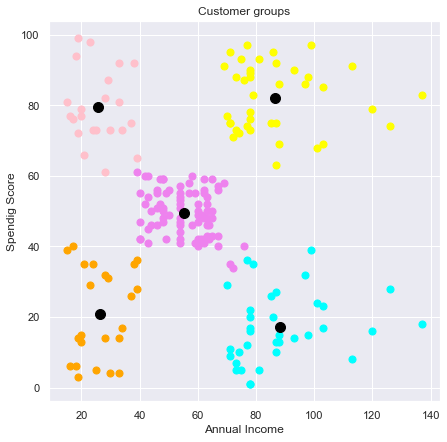

In [138]:
plt.figure(figsize=(7,7))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='violet',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='cyan',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='orange',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='yellow',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='pink',label='Cluster 5')

#plot centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroid')
plt.title("Customer groups")
plt.xlabel("Annual Income")
plt.ylabel("Spendig Score")
plt.show()

 ### Case study
 From the above clusters we can conclude that 
 1. The cluster 5 of people have minimal income but do expend more in the mall
 2. The cluster 4 of people have more income and do expend more in the mall
 3. The cluster 3 of people have minimal income and do minimal expend in the mall
 4. The cluster 2 of people have more  income but do minimal expend in the mall
 5. The cluster 1 of people balance both the income and expenditure
### So mall can give more amount of discount to cluster 5 set of people
 